In [1]:
# these are our usual librairies
# be sure that these load properly
# if they don't, you may have to install the libraries
# recall that you can install them using commands similar to:
# !pip install pandas
# !pip install statsmodels
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# be sure to have the csv file collegeadmissions.csv in the same directory as this ipynb
df = pd.read_csv("collegeadmissions.csv")
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [3]:
# some of the column heading names don't have the best format so we will fix this here
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')
# df.iloc[:,90:100]
df.columns[90:100]

Index(['percent_of_first_time_undergraduates___foreign_countries',
       'number_of_first_time_undergraduates___residence_unknown',
       'percent_of_first_time_undergraduates___residence_unknown',
       'graduation_rate___bachelor_degree_within_4_years,_total',
       'graduation_rate___bachelor_degree_within_5_years,_total',
       'graduation_rate___bachelor_degree_within_6_years,_total',
       'percent_of_freshmen_receiving_any_financial_aid',
       'percent_of_freshmen_receiving_federal,_state,_local_or_institutional_grant_aid',
       'percent_of_freshmen__receiving_federal_grant_aid',
       'percent_of_freshmen_receiving_pell_grants'],
      dtype='object')

In [4]:
df.describe()

,applicants_total,admissions_total,enrolled_total,percent_of_freshmen_submitting_sat_scores,percent_of_freshmen_submitting_act_scores,sat_critical_reading_25th_percentile_score,sat_critical_reading_75th_percentile_score,sat_math_25th_percentile_score,sat_math_75th_percentile_score,sat_writing_25th_percentile_score,...,percent_of_freshmen__receiving_federal_grant_aid,percent_of_freshmen_receiving_pell_grants,percent_of_freshmen_receiving_other_federal_grant_aid,percent_of_freshmen_receiving_state/local_grant_aid,percent_of_freshmen_receiving_institutional_grant_aid,percent_of_freshmen_receiving_student_loan_aid,percent_of_freshmen_receiving_federal_student_loans,percent_of_freshmen_receiving_other_loan_aid,endowment_assets_year_end_per_fte_enrollment_gasb,endowment_assets_year_end_per_fte_enrollment_fasb
count,1377.000000,1377.000000,1377.000000,1257.000000,1259.000000,1169.000000,1169.000000,1182.000000,1182.000000,714.000000,...,1492.00000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,516.000000,9.600000e+02
mean,6391.193174,3554.880174,1043.046478,53.927605,53.085782,470.340462,578.297690,480.514382,588.311337,470.931373,...,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619,9459.463178,6.503032e+04
std,8787.469171,4309.457606,1285.165519,34.385164,31.658662,68.368390,70.169391,72.464475,71.871189,79.670620,...,18.88068,18.560557,14.091423,21.897744,29.463324,19.143070,19.337354,7.706674,19398.443224,1.773784e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000,360.000000,280.000000,410.000000,310.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,4.200000e+01
25%,1488.000000,950.000000,287.000000,16.000000,26.000000,430.000000,530.000000,430.000000,540.000000,416.250000,...,28.00000,27.000000,6.000000,18.000000,48.000000,54.000000,53.000000,2.000000,2080.000000,8.391000e+03
50%,3350.000000,2056.000000,538.000000,65.000000,49.000000,460.000000,570.000000,470.000000,580.000000,450.000000,...,40.00000,39.000000,12.000000,34.000000,78.000000,68.000000,67.000000,6.000000,4283.000000,1.870400e+04
75%,7016.000000,4203.000000,1246.000000,86.000000,87.000000,500.000000,620.000000,510.000000,630.000000,510.000000,...,51.25000,51.000000,20.250000,50.000000,98.000000,79.000000,78.000000,11.000000,8715.500000,4.505250e+04
max,72676.000000,35815.000000,10241.000000,100.000000,100.000000,720.000000,800.000000,770.000000,800.000000,720.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,213079.000000,2.505435e+06


In [5]:
# there is a lot of data in this csv file
# instead of keeping all of it, let's start by just selecting the information
# that we want to look at by taking the college name so we know what the data
# represents and 11 of the numerical columns and then reducing
# the dataframe to only rows where all 11 observations are avaialable
#
# the first column is:
# Name - the name of the college or university
#
# the other 11 columns are:
# Applicants total - how many applications
# Admissions total - how many admissions
# Enrolled total - how many of the admittes students chose the university or college
# ACT Composite 75th percentile score - ACT Score
# Estimated undergraduate enrollment, total
# Total price for in-state students living on campus 2013-14
# Total price for out-of-state students living on campus 2013-14
# Percent of total enrollment that are White
# Percent of undergraduate enrollment that are women
# Graduation rate - Bachelor degree within 5 years, total
# Percent of freshmen receiving any financial aid

df = df[['name', 'applicants_total', 'admissions_total',
         'enrolled_total',
         'act_composite_75th_percentile_score',
         'estimated_undergraduate_enrollment,_total',
         'total_price_for_in_state_students_living_on_campus_2013_14',
         'total_price_for_out_of_state_students_living_on_campus_2013_14',
         'percent_of_total_enrollment_that_are_white',
         'percent_of_undergraduate_enrollment_that_are_women',
         'graduation_rate___bachelor_degree_within_5_years,_total',
         'percent_of_freshmen_receiving_any_financial_aid',
        'percent_of_freshmen_receiving_pell_grants']]
df=df.dropna() # this drops the rows that have missing values
df.describe()

,applicants_total,admissions_total,enrolled_total,act_composite_75th_percentile_score,"estimated_undergraduate_enrollment,_total",total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,percent_of_total_enrollment_that_are_white,percent_of_undergraduate_enrollment_that_are_women,"graduation_rate___bachelor_degree_within_5_years,_total",percent_of_freshmen_receiving_any_financial_aid,percent_of_freshmen_receiving_pell_grants
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,6761.020495,3746.029889,1109.545687,25.635354,5985.975235,35119.583262,39157.793339,62.113578,56.492741,52.356106,91.099915,37.672929
std,9207.785115,4485.344348,1335.378034,3.375287,7509.017832,13150.544972,10365.787635,20.792543,11.654744,18.568757,11.524827,15.940051
min,119.000000,62.000000,33.000000,14.000000,162.000000,11398.000000,11398.000000,0.000000,0.000000,2.000000,41.000000,5.000000
25%,1633.500000,1011.500000,304.500000,24.000000,1518.500000,22731.000000,31792.000000,53.000000,51.000000,38.500000,87.000000,26.000000
50%,3479.000000,2135.000000,559.000000,25.000000,2788.000000,34689.000000,37570.000000,67.000000,56.000000,51.000000,96.000000,36.000000
75%,7267.000000,4465.000000,1326.500000,28.000000,7051.500000,44651.000000,45879.000000,77.000000,61.000000,64.000000,100.000000,47.000000
max,72676.000000,35815.000000,10241.000000,35.000000,51269.000000,64988.000000,64988.000000,96.000000,100.000000,96.000000,100.000000,94.000000


In [6]:
# lets's start with a correlation matrix
df.corr()

,applicants_total,admissions_total,enrolled_total,act_composite_75th_percentile_score,"estimated_undergraduate_enrollment,_total",total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,percent_of_total_enrollment_that_are_white,percent_of_undergraduate_enrollment_that_are_women,"graduation_rate___bachelor_degree_within_5_years,_total",percent_of_freshmen_receiving_any_financial_aid,percent_of_freshmen_receiving_pell_grants
applicants_total,1.000000,0.850997,0.782896,0.397111,0.743812,0.048229,0.309317,-0.205045,-0.153938,0.373022,-0.549931,-0.297804
admissions_total,0.850997,1.000000,0.881969,0.242204,0.829953,-0.121052,0.160058,-0.103015,-0.151773,0.231677,-0.409528,-0.250568
enrolled_total,0.782896,0.881969,1.000000,0.249229,0.957130,-0.283698,0.022267,-0.059402,-0.177781,0.183762,-0.462133,-0.242022
act_composite_75th_percentile_score,0.397111,0.242204,0.249229,1.000000,0.186158,0.533385,0.660380,0.266327,-0.195752,0.797959,-0.432042,-0.777295
"estimated_undergraduate_enrollment,_total",0.743812,0.829953,0.957130,0.186158,1.000000,-0.347951,-0.055759,-0.097161,-0.146207,0.082282,-0.429897,-0.169369
total_price_for_in_state_students_living_on_campus_2013_14,0.048229,-0.121052,-0.283698,0.533385,-0.347951,1.000000,0.897442,0.002089,0.063170,0.634728,-0.042169,-0.447727
total_price_for_out_of_state_students_living_on_campus_2013_14,0.309317,0.160058,0.022267,0.660380,-0.055759,0.897442,1.000000,-0.024148,-0.028547,0.736844,-0.265670,-0.569999
percent_of_total_enrollment_that_are_white,-0.205045,-0.103015,-0.059402,0.266327,-0.097161,0.002089,-0.024148,1.000000,-0.078474,0.233651,0.120188,-0.437215
percent_of_undergraduate_enrollment_that_are_women,-0.153938,-0.151773,-0.177781,-0.195752,-0.146207,0.063170,-0.028547,-0.078474,1.000000,-0.086331,0.175882,0.217362
"graduation_rate___bachelor_degree_within_5_years,_total",0.373022,0.231677,0.183762,0.797959,0.082282,0.634728,0.736844,0.233651,-0.086331,1.000000,-0.393769,-0.753881


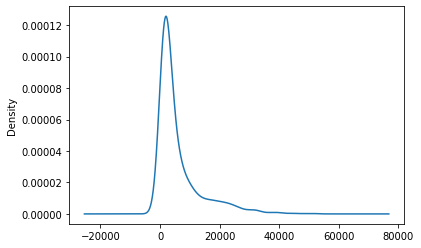

In [7]:
# a kernel density plot may help too
df["estimated_undergraduate_enrollment,_total"].plot.kde()

In [8]:
# some schools look to be really large or really small
# how can we see this data?
df.sort_values(by=["estimated_undergraduate_enrollment,_total"])

,name,applicants_total,admissions_total,enrolled_total,act_composite_75th_percentile_score,"estimated_undergraduate_enrollment,_total",total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,percent_of_total_enrollment_that_are_white,percent_of_undergraduate_enrollment_that_are_women,"graduation_rate___bachelor_degree_within_5_years,_total",percent_of_freshmen_receiving_any_financial_aid,percent_of_freshmen_receiving_pell_grants
941,Mid-Atlantic Christian University,168.0,69.0,37.0,20.0,162.0,25090.0,25090.0,69.0,52.0,50.0,100.0,58.0
1352,College of St Joseph,183.0,125.0,33.0,18.0,176.0,33700.0,33700.0,83.0,52.0,19.0,96.0,75.0
1290,Paul Quinn College,632.0,623.0,70.0,18.0,243.0,26300.0,26300.0,1.0,54.0,5.0,71.0,59.0
1060,Bryn Athyn College of the New Church,396.0,205.0,81.0,25.0,264.0,29734.0,29734.0,68.0,52.0,6.0,100.0,39.0
614,Kuyper College,152.0,104.0,37.0,25.0,287.0,27970.0,27970.0,77.0,52.0,37.0,99.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,The University of Texas at Austin,38161.0,15335.0,7249.0,31.0,39979.0,26156.0,50200.0,48.0,52.0,75.0,63.0,26.0
1309,Texas A & M University-College Station,31387.0,21803.0,10241.0,29.0,44073.0,21051.0,37671.0,63.0,48.0,75.0,79.0,26.0
998,Ohio State University-Main Campus,31359.0,17413.0,7130.0,31.0,44201.0,25479.0,41199.0,69.0,47.0,81.0,83.0,19.0
1371,Liberty University,48054.0,10405.0,4690.0,26.0,48977.0,33544.0,33544.0,45.0,59.0,43.0,95.0,40.0


-0.8782052170721303

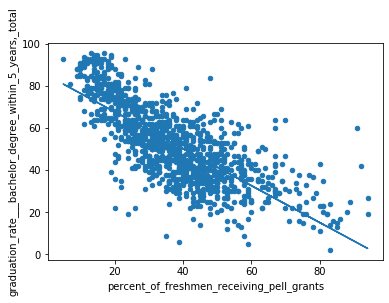

In [9]:
# next let's look at some scatter plots
df.plot.scatter(x='percent_of_freshmen_receiving_pell_grants',y='graduation_rate___bachelor_degree_within_5_years,_total')
x=df['percent_of_freshmen_receiving_pell_grants']
y=df['graduation_rate___bachelor_degree_within_5_years,_total']
m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x + b)
m

In [14]:
# how about an OLS?
YVar2 = df[["graduation_rate___bachelor_degree_within_5_years,_total"]]
XVar2 = sm.add_constant(df[['percent_of_freshmen_receiving_pell_grants', 'total_price_for_in_state_students_living_on_campus_2013_14']])
LinearModel2 = sm.OLS(YVar2, XVar2)
results = LinearModel2.fit()
print(results.summary())


                                               OLS Regression Results                                              
Dep. Variable:     graduation_rate___bachelor_degree_within_5_years,_total   R-squared:                       0.679
Model:                                                                 OLS   Adj. R-squared:                  0.678
Method:                                                      Least Squares   F-statistic:                     1234.
Date:                                                     Thu, 23 Apr 2020   Prob (F-statistic):          8.95e-289
Time:                                                             12:00:15   Log-Likelihood:                -4417.2
No. Observations:                                                     1171   AIC:                             8840.
Df Residuals:                                                         1168   BIC:                             8856.
Df Model:                                                               

In [15]:
YVar2 = df[["graduation_rate___bachelor_degree_within_5_years,_total"]]
XVar2 = sm.add_constant(df[['percent_of_freshmen_receiving_pell_grants', 'total_price_for_in_state_students_living_on_campus_2013_14', 'act_composite_75th_percentile_score', 'graduation_rate___bachelor_degree_within_5_years,_total']])
LinearModel2 = sm.OLS(YVar2, XVar2)
results = LinearModel2.fit()
print(results.summary())


                                               OLS Regression Results                                              
Dep. Variable:     graduation_rate___bachelor_degree_within_5_years,_total   R-squared:                       1.000
Model:                                                                 OLS   Adj. R-squared:                  1.000
Method:                                                      Least Squares   F-statistic:                 2.920e+30
Date:                                                     Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                                                             12:00:20   Log-Likelihood:                 32667.
No. Observations:                                                     1171   AIC:                        -6.532e+04
Df Residuals:                                                         1166   BIC:                        -6.530e+04
Df Model:                                                               

In [11]:
# how about an OLS?
YVar = df[["graduation_rate___bachelor_degree_within_5_years,_total"]]
XVar = sm.add_constant(df[['applicants_total', 'admissions_total',
         'enrolled_total',
         'act_composite_75th_percentile_score',
         'estimated_undergraduate_enrollment,_total',
         'total_price_for_in_state_students_living_on_campus_2013_14',
         'total_price_for_out_of_state_students_living_on_campus_2013_14',
         'percent_of_total_enrollment_that_are_white',
         'percent_of_undergraduate_enrollment_that_are_women',
         'percent_of_freshmen_receiving_any_financial_aid',
          'percent_of_freshmen_receiving_pell_grants']])
LinearModel = sm.OLS(YVar, XVar).fit()
print(LinearModel.summary())

                                               OLS Regression Results                                              
Dep. Variable:     graduation_rate___bachelor_degree_within_5_years,_total   R-squared:                       0.775
Model:                                                                 OLS   Adj. R-squared:                  0.773
Method:                                                      Least Squares   F-statistic:                     362.2
Date:                                                     Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                                                             11:09:23   Log-Likelihood:                -4209.6
No. Observations:                                                     1171   AIC:                             8443.
Df Residuals:                                                         1159   BIC:                             8504.
Df Model:                                                               

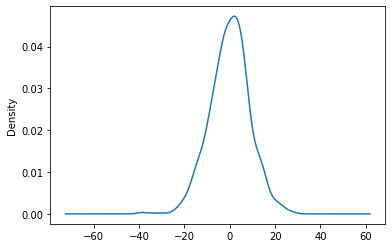

In [12]:
# Let's plot the residuals to see how they are distributed
LinearModel.resid.plot.kde()

In [ ]:
# do a deeper dive with the residuals to test the assumptions of OLS

In [ ]:
# let's take a look at the residuals after mapping them to the names
# of the colleges or universities
residuals = pd.concat([df['name'], LinearModel.resid], axis=1)
residuals.sort_values(by=[0])

In [ ]:
LinearModel.resid

In [ ]:
# residuals
residuals[[0]]<20